<a href="https://colab.research.google.com/github/Bharathkumar-Tamilarasu/Cinematic-Correlation-Explorer/blob/main/Cinematic_Correlation_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import regex as re

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Self Projects/Alex_Projects/Project 4_Cinematic Correlation Explorer/moviescsv.csv')

### Dataset First View

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(7668, 15)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
# Dropping null rows

df=df.dropna()

## ***2. Understanding Our Variables***

In [10]:
# Dataset Columns
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include = 'all')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
count,5421,5421,5421,5421.000000,5421,5421.000000,5.421000e+03,5421,5421,5421,5421,5.421000e+03,5.421000e+03,5421,5421.000000
unique,5336,10,15,NaN,2560,NaN,NaN,2063,3205,1845,50,NaN,NaN,1475,NaN
top,Hercules,R,Comedy,NaN,"August 26, 2016 (United States)",NaN,NaN,Woody Allen,Woody Allen,Nicolas Cage,United States,NaN,NaN,Universal Pictures,NaN
freq,3,2597,1496,NaN,7,NaN,NaN,33,32,40,4319,NaN,NaN,330,NaN
mean,NaN,NaN,NaN,2001.661317,NaN,6.392455,1.150661e+05,NaN,NaN,NaN,NaN,3.600917e+07,1.032297e+08,NaN,108.152739
std,NaN,NaN,NaN,10.540908,NaN,0.962730,1.844073e+05,NaN,NaN,NaN,NaN,4.157337e+07,1.873027e+08,NaN,18.115698
min,NaN,NaN,NaN,1980.000000,NaN,1.900000,1.950000e+02,NaN,NaN,NaN,NaN,6.000000e+03,3.090000e+02,NaN,63.000000
25%,NaN,NaN,NaN,1993.000000,NaN,5.800000,1.900000e+04,NaN,NaN,NaN,NaN,1.000000e+07,1.073640e+07,NaN,95.000000
50%,NaN,NaN,NaN,2002.000000,NaN,6.500000,5.200000e+04,NaN,NaN,NaN,NaN,2.180000e+07,3.686941e+07,NaN,105.000000
75%,NaN,NaN,NaN,2011.000000,NaN,7.100000,1.290000e+05,NaN,NaN,NaN,NaN,4.500000e+07,1.124625e+08,NaN,118.000000


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in list(df.columns):
  print(f'Number of unique values in {i} column:\n\n {pd.unique(df[i])}')

Number of unique values in name column:

 ['The Shining' 'The Blue Lagoon'
 'Star Wars: Episode V - The Empire Strikes Back' ... 'Dolittle'
 'The Call of the Wild' 'The Eight Hundred']
Number of unique values in rating column:

 ['R' 'PG' 'G' 'NC-17' 'Approved' 'Not Rated' 'PG-13' 'Unrated' 'X' 'TV-MA']
Number of unique values in genre column:

 ['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Animation' 'Family' 'Western' 'Sci-Fi' 'Romance' 'Thriller'
 'Mystery']
Number of unique values in year column:

 [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Number of unique values in released column:

 ['June 13, 1980 (United States)' 'July 2, 1980 (United States)'
 'June 20, 1980 (United States)' ... 'February 14, 2020 (United States)'
 'February 21, 2020 (United States)' 'August 28, 2020 (United Stat

## 3. ***Data Wrangling***

### Dataset Information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


### Data Wrangling Code

In [14]:
# Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
#Changing the data type of columns

df['budget']=df['budget'].astype(int)
df['gross']=df['gross'].astype(int)

In [16]:
#Extracting year from Released column

df['releasedyear']=df['released'].str.extract('([0-9]{4})')[0].astype(int)

In [17]:
# Deletion of duplicate values

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


## 4. ***Experiment***

In [18]:
# Inital Educated Statements
# 1. Budget have high correlation with Gross Earnings
# 2. Company have high correaltion with Gross Earnings
# 3. Check if Anyother feature (Numerical/Categorical) have high correlation

### Investigation 1:

<function matplotlib.pyplot.show(close=None, block=None)>

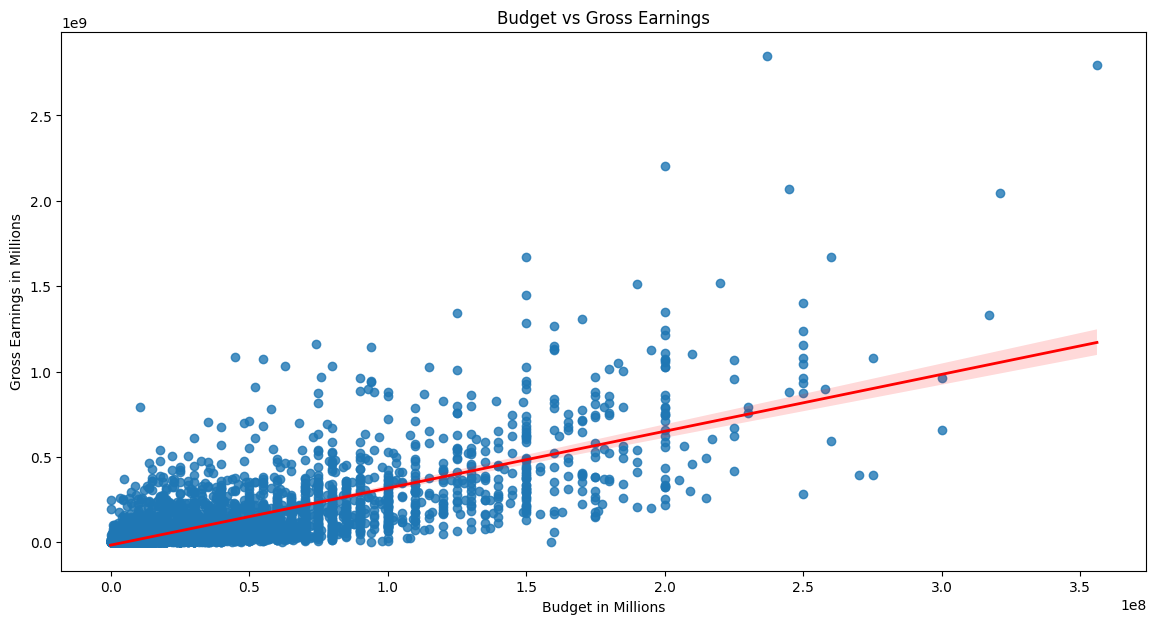

In [19]:
# Investigating Statement 1
# i.e Budget have high correlation with Gross Earnings

# Budget vs Gross using RegPlot

plt.figure(figsize=(14, 7))
sns.regplot(x='budget',y='gross',data=df,line_kws={"color":"red","linewidth": 2})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget in Millions')
plt.ylabel('Gross Earnings in Millions')
plt.show

In [20]:
# Correlation Matrix between All Numerical columns

df.corr(method='spearman',numeric_only=True)

,year,score,votes,budget,gross,runtime,releasedyear
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
releasedyear,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


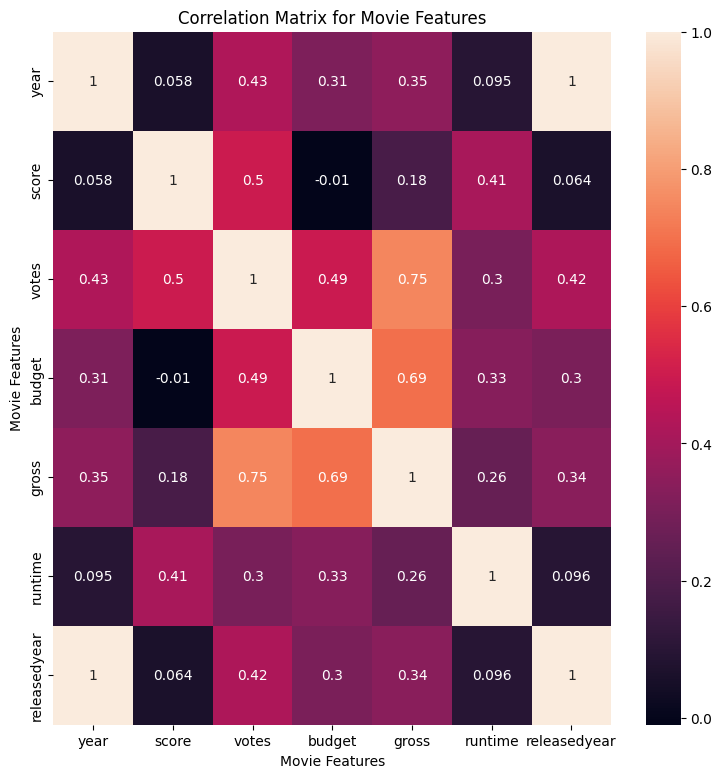

In [21]:
# Correlation using Heat Map

corr_matrix = df.corr(method = "spearman",numeric_only=True)
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

**Conclusion: Budget have high correlation with Gross Earnings. So statement 1 is True**

### Investigation 2:

In [22]:
# Investigating Statement 2
#  i.e Company have high correaltion with Gross Earnings
df_new = df

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5421 non-null   object 
 1   rating        5421 non-null   object 
 2   genre         5421 non-null   object 
 3   year          5421 non-null   int64  
 4   released      5421 non-null   object 
 5   score         5421 non-null   float64
 6   votes         5421 non-null   float64
 7   director      5421 non-null   object 
 8   writer        5421 non-null   object 
 9   star          5421 non-null   object 
 10  country       5421 non-null   object 
 11  budget        5421 non-null   int64  
 12  gross         5421 non-null   int64  
 13  company       5421 non-null   object 
 14  runtime       5421 non-null   float64
 15  releasedyear  5421 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 720.0+ KB


In [24]:
df_new.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980


In [25]:
# Assigning a random numerical value for Each unique categorical value

for col in df_new.columns:
 if df_new[col].dtype == 'object':
  df_new[col]=df_new[col].astype('category')
  df_new[col]=df_new[col].cat.codes

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5421 non-null   int16  
 1   rating        5421 non-null   int8   
 2   genre         5421 non-null   int8   
 3   year          5421 non-null   int64  
 4   released      5421 non-null   int16  
 5   score         5421 non-null   float64
 6   votes         5421 non-null   float64
 7   director      5421 non-null   int16  
 8   writer        5421 non-null   int16  
 9   star          5421 non-null   int16  
 10  country       5421 non-null   int8   
 11  budget        5421 non-null   int64  
 12  gross         5421 non-null   int64  
 13  company       5421 non-null   int16  
 14  runtime       5421 non-null   float64
 15  releasedyear  5421 non-null   int64  
dtypes: float64(3), int16(6), int64(4), int8(3)
memory usage: 418.2 KB


In [27]:
df_new.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedyear
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980


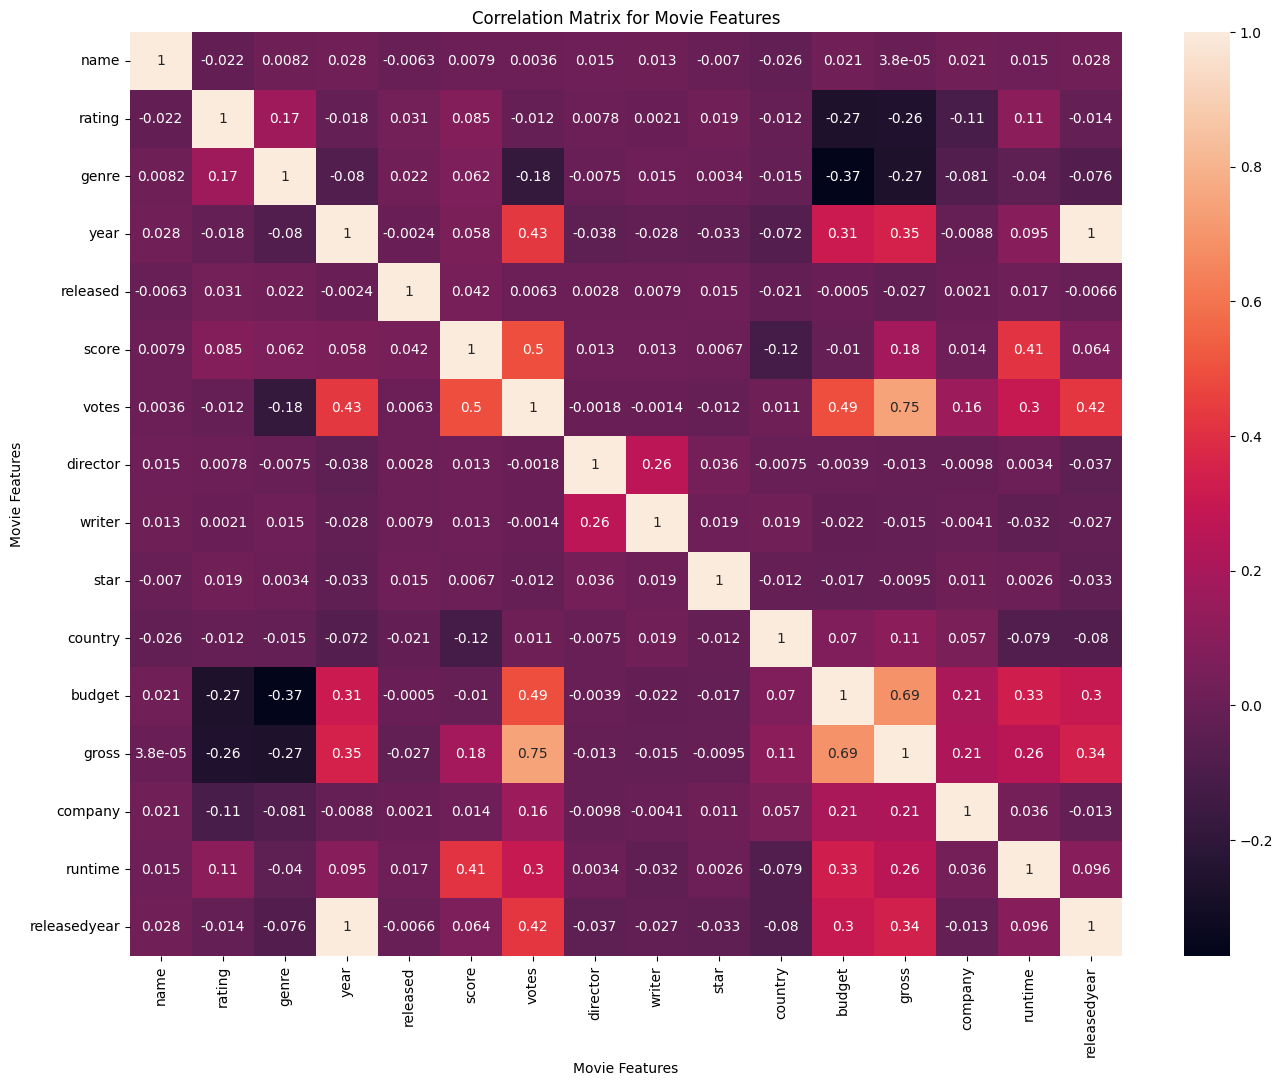

In [28]:
# Correlation using Heat Map

corr_matrix = df_new.corr('spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

**Conclusion: Company have less correlation with Gross Earnings. So statement 2 is False**

### Investigation 3:

In [29]:
# Check if Anyother feature (Numerical/Categorical) have high correlation

# To diplay all the rows
pd.set_option('display.max_rows', None)

# Unstacking the correlation matrix
corr_pairs = corr_matrix.unstack()
print(corr_pairs)

name          name            1.000000
              rating         -0.021980
              genre           0.008213
              year            0.027766
              released       -0.006341
              score           0.007866
              votes           0.003615
              director        0.014933
              writer          0.013023
              star           -0.007027
              country        -0.026431
              budget          0.021395
              gross           0.000038
              company         0.021247
              runtime         0.014849
              releasedyear    0.027590
rating        name           -0.021980
              rating          1.000000
              genre           0.167778
              year           -0.018206
              released        0.031301
              score           0.085237
              votes          -0.011871
              director        0.007809
              writer          0.002124
              star       

In [30]:
# Sorting the correlation pairs

sorted_pair = corr_pairs.sort_values(ascending=False)
print(sorted_pair)

name          name            1.000000
rating        rating          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
releasedyear  releasedyear    1.000000
              year            0.998694
year          releasedyear    0.998694
gross         votes           0.745793
votes         gross           0.745793
budget        gross           0.692958
gross         budget          0.692958
score         votes           0.495409
votes         score           0.495409
budget        votes           0.493461
votes         budget     

**Conclusion: 'Votes' have high correlation with Gross Earnings.**